In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')
import tensorflow

# Get Data

In [2]:
from merge_years.import_data import get_full_data

In [3]:
!pwd

/Users/admin/code/1kruidenp/fflpred/notebooks


In [4]:
full_raw_data=get_full_data('../raw_data')

In [5]:
full_raw_data.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,GW,season,position,dreamteam_yearly_average,team_id,team_name,opponent_level,team_level,kickoff_date
0,aaron connolly,0,0,1,0,0.1,534,37,1,0,...,0,4,20,FWD,NaN,4.0,Brighton,1330.0,1010.0,2019-08-31
1,aaron connolly,0,0,1,0,0.3,534,43,1,0,...,0,5,20,FWD,NaN,4.0,Brighton,1180.0,1050.0,2019-09-14
2,aaron connolly,0,0,1,0,4.8,534,58,0,0,...,0,6,20,FWD,NaN,4.0,Brighton,1090.0,1010.0,2019-09-21
3,aaron connolly,0,0,2,0,0.6,534,63,1,0,...,0,7,20,FWD,NaN,4.0,Brighton,1220.0,1010.0,2019-09-28
4,aaron connolly,0,3,53,1,23.8,534,72,0,2,...,0,8,20,FWD,NaN,4.0,Brighton,1240.0,1050.0,2019-10-05


In [6]:
full_raw_data.shape

(114992, 40)

In [7]:
j=0
for i,row in full_raw_data.iterrows():
    if row['name']=='caglar söyüncü':
        print(j)
        full_raw_data['position'].at[i]='DEF'
        j+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


# Split between train and test

We will use the last 10 gameweeks of 2021 (for those playing) as test 

In [8]:
ra=3 #rolling average

test_raw_df = full_raw_data[(full_raw_data.season > 20) & (full_raw_data.GW >= 34-ra)]
train_raw_df = full_raw_data[~((full_raw_data.season > 20) & (full_raw_data.GW >= 34-ra))]
#train_raw_df = full_raw_data[(full_raw_data.season < 21) & (full_raw_data.GW < 29-ra)]
#pd.concat([train_raw_df,full_raw_data[(full_raw_data.season == 21) & (full_raw_data.GW < 29-ra)]])
test_raw_df.shape

(5617, 40)

In [9]:
assert(len(train_raw_df)+len(test_raw_df)==len(full_raw_data))

# Split between rookies and non rookies

In [10]:
#for player in train_raw['name'].unique():
#    train_raw[train_raw['name']==player]


In [11]:
#train_raw_df[train_raw_df['name']=='harry kane']['season'].min()

In [12]:
#player_dtya={} #Give players with dtya (should be all non rookies) the
#for i,player in enumerate(not_processed_df['name'].unique()):
#    player_dtya[player]=not_processed_df[not_processed_df['name']==player]['dreamteam_yearly_average'].max()
#    if i%100==0:
#        print(player,i)

# Split between positions

In [13]:
fwd_df_train = train_raw_df[(train_raw_df.position=='FWD')]
mid_df_train = train_raw_df[(train_raw_df.position=='MID')]
def_df_train = train_raw_df[(train_raw_df.position=='DEF')]
gk_df_train = train_raw_df[(train_raw_df.position=='GK')]

fwd_df_test = test_raw_df[(test_raw_df.position=='FWD')]
mid_df_test = test_raw_df[(test_raw_df.position=='MID')]
def_df_test = test_raw_df[(test_raw_df.position=='DEF')]
gk_df_test = test_raw_df[(test_raw_df.position=='GK')]

In [14]:
print(fwd_df_train.shape)
print(mid_df_train.shape)
print(def_df_train.shape)
print(gk_df_train.shape)
print("")
print(fwd_df_test.shape )
print(mid_df_test.shape )
print(def_df_test.shape )
print(gk_df_test.shape )

(15366, 40)
(45039, 40)
(37049, 40)
(11921, 40)

(728, 40)
(2294, 40)
(1951, 40)
(644, 40)


In [15]:
train_raw_df.shape

(109375, 40)

In [16]:
14907+43598+35796+11503

105804

# Preprocessing

In [17]:
fwd_df_train.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)
mid_df_train.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)
def_df_train.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)
gk_df_train.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)
fwd_df_test.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True)  
mid_df_test.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True) 
def_df_test.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True) 
gk_df_test.drop(columns=['fixture', 'element', 'team_a_score', 'team_h_score', 'team_id', 'team_name'],inplace=True) 




/Users/admin/.pyenv/versions/3.8.6/envs/fflpred/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Forwards 

In [18]:
fwd_df_train.head(1)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,...,value,was_home,yellow_cards,GW,season,position,dreamteam_yearly_average,opponent_level,team_level,kickoff_date
0,aaron connolly,0,0,1,0,0.1,1,0,0.0,0.2,...,45,False,0,4,20,FWD,NaN,1330.0,1010.0,2019-08-31


In [19]:
fwd_df_train.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW', 'season',
       'position', 'dreamteam_yearly_average', 'opponent_level', 'team_level',
       'kickoff_date'],
      dtype='object')

The columns we want for forwards are (for now)


In [20]:
fwd_features=['name', 'assists', 'bps', 'creativity', 'goals_scored', 
              'ict_index', 'influence','kickoff_time','minutes',
              'penalties_missed','red_cards','selected','threat','total_points','transfers_balance',
              'value','was_home','yellow_cards','GW','season','opponent_level','team_level']

In [21]:
fwd_train=fwd_df_train[fwd_features]
fwd_test=fwd_df_test[fwd_features]

In [22]:
fwd_train['cards']=fwd_train['yellow_cards']+fwd_train['red_cards']
fwd_test['cards']=fwd_test['yellow_cards']+fwd_test['red_cards']



<ipython-input-22-bb4ec425f763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fwd_train['cards']=fwd_train['yellow_cards']+fwd_train['red_cards']
<ipython-input-22-bb4ec425f763>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fwd_test['cards']=fwd_test['yellow_cards']+fwd_test['red_cards']


In [23]:
fwd_train.columns

Index(['name', 'assists', 'bps', 'creativity', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'penalties_missed', 'red_cards',
       'selected', 'threat', 'total_points', 'transfers_balance', 'value',
       'was_home', 'yellow_cards', 'GW', 'season', 'opponent_level',
       'team_level', 'cards'],
      dtype='object')

In [24]:
rolling_features=['name','assists','bps','creativity','goals_scored','ict_index','influence',
                  'minutes','selected','threat','total_points','transfers_balance','value','penalties_missed','cards']

static_features=['kickoff_time','was_home','GW','season','opponent_level','team_level']

total_points_train=fwd_train['total_points']
total_points_test=fwd_test['total_points']




### Rolling features

In [25]:
rolling_df_train=fwd_train[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()
rolling_df_test=fwd_test[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()


In [26]:
rolling_df_train.rename(columns={'total_points':'rolling_points'},inplace=True)
rolling_df_test.rename(columns={'total_points':'rolling_points'},inplace=True)

In [27]:

result = map(lambda position:position, total_points_train)
rolling_df_train['total_points']=list(result)

result = map(lambda position:position, total_points_test)
rolling_df_test['total_points']=list(result)

In [28]:
rolling_df_train.head()

assists       bps  creativity  goals_scored  ict_index  \
name                                                                       
aaron connolly 0      NaN       NaN         NaN           NaN        NaN   
               1      NaN       NaN         NaN           NaN        NaN   
               2      NaN       NaN         NaN           NaN        NaN   
               3      0.0  1.000000    1.733333           0.0   1.566667   
               4      0.0  1.333333    1.900000           0.0   1.600000   

                  influence    minutes      selected  threat  rolling_points  \
name                                                                           
aaron connolly 0        NaN        NaN           NaN     NaN             NaN   
               1        NaN        NaN           NaN     NaN             NaN   
               2        NaN        NaN           NaN     NaN             NaN   
               3   1.066667  16.666667  12277.666667    13.0             1.0   
               4   1.066667  17.000000  23177.333333    13.0             1.0   

                  transfers_balance  value  penalties_missed  cards  \
name                                                                  
aaron connolly 0                NaN    NaN               NaN    NaN   
               1                NaN    NaN               NaN    NaN   
               2                NaN    NaN               NaN    NaN   
               3        6226.333333   45.0               0.0    0.0   
               4        9038.666667   45.0               0.0    0.0   

                  total_points  
name                            
aaron connolly 0             1  
               1             1  
               2             1  
               3             1  
               4            13

In [29]:
for i in static_features:
    result = map(lambda position:position, fwd_train[i])
    rolling_df_train[i]=list(result)
for i in static_features:
    result = map(lambda position:position, fwd_test[i])
    rolling_df_test[i]=list(result)



In [30]:
rolling_df_train.dropna(inplace=True)
rolling_df_test.dropna(inplace=True)

In [31]:
rolling_df_train.isnull().sum().sort_values(ascending=False)

assists              0
value                0
opponent_level       0
season               0
GW                   0
was_home             0
kickoff_time         0
total_points         0
cards                0
penalties_missed     0
transfers_balance    0
bps                  0
rolling_points       0
threat               0
selected             0
minutes              0
influence            0
ict_index            0
goals_scored         0
creativity           0
team_level           0
dtype: int64

In [32]:
rolling_df_train.drop(columns=['creativity','influence','threat'],inplace=True)
rolling_df_test.drop(columns=['creativity','influence','threat'],inplace=True)

In [33]:
time=[]
for row in rolling_df_train['kickoff_time']:
    time.append(row.hour)
rolling_df_train['time']=time

time=[]
for row in rolling_df_test['kickoff_time']:
    time.append(row.hour)
rolling_df_test['time']=time

In [34]:
rolling_df_train.drop(columns='kickoff_time',inplace=True)
rolling_df_test.drop(columns='kickoff_time',inplace=True)

In [35]:
rolling_df_train.columns

Index(['assists', 'bps', 'goals_scored', 'ict_index', 'minutes', 'selected',
       'rolling_points', 'transfers_balance', 'value', 'penalties_missed',
       'cards', 'total_points', 'was_home', 'GW', 'season', 'opponent_level',
       'team_level', 'time'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(rolling_df_train[['was_home']])
rolling_df_train['was_home'] = encoder.transform(rolling_df_train[['was_home']])

encoder = LabelEncoder()
encoder.fit(rolling_df_test[['was_home']])
rolling_df_test['was_home'] = encoder.transform(rolling_df_test[['was_home']])

/Users/admin/.pyenv/versions/3.8.6/envs/fflpred/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
rolling_df_train=rolling_df_train.reset_index()
rolling_df_test=rolling_df_test.reset_index()


In [38]:

hold_train=rolling_df_train[['name','GW','season']]
hold_test=rolling_df_test[['name','GW','season']]

rolling_df_train.drop(columns=['name','GW','season','level_1'],inplace=True)
rolling_df_test.drop(columns=['name','GW','season','level_1'],inplace=True)

In [39]:
rolling_df_train.head()

,assists,bps,goals_scored,ict_index,minutes,selected,rolling_points,transfers_balance,value,penalties_missed,cards,total_points,was_home,opponent_level,team_level,time
0,0.000000,1.000000,0.000000,1.566667,16.666667,12277.666667,1.000000,6226.333333,45.000000,0.0,0.0,1,0,1220.0,1010.0,14
1,0.000000,1.333333,0.000000,1.600000,17.000000,23177.333333,1.000000,9038.666667,45.000000,0.0,0.0,13,1,1240.0,1050.0,11
2,0.000000,18.666667,0.666667,7.566667,41.333333,30176.333333,5.000000,6227.666667,45.000000,0.0,0.0,1,0,1020.0,1010.0,14
3,0.000000,19.333333,0.666667,7.933333,49.666667,59556.333333,5.000000,27131.666667,45.000000,0.0,0.0,8,1,1240.0,1050.0,14
4,0.666667,26.000000,0.666667,7.966667,67.666667,97405.666667,7.333333,35975.666667,45.333333,0.0,0.0,2,1,1020.0,1050.0,15


In [40]:
rolling_df_train.columns

Index(['assists', 'bps', 'goals_scored', 'ict_index', 'minutes', 'selected',
       'rolling_points', 'transfers_balance', 'value', 'penalties_missed',
       'cards', 'total_points', 'was_home', 'opponent_level', 'team_level',
       'time'],
      dtype='object')

In [41]:
rolling_df_train.shape

(5253, 16)

## Models for the forwards

### Gradient Boosting

In [42]:
X_train=rolling_df_train.drop(columns=['total_points','goals_scored'])
X_test=rolling_df_test.drop(columns=['total_points','goals_scored'])

In [43]:
y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.2334163531487103

In [45]:
"""
from sklearn.metrics import make_scorer

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 8),
    "min_samples_leaf": np.linspace(0.1, 0.5, 8),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[10,100]
    }

clf = GridSearchCV(GradientBoostingRegressor(), parameters,cv=3, n_jobs=-1)
clf.fit(X_train, y_train)
"""

'\nfrom sklearn.metrics import make_scorer\n\nparameters = {\n    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],\n    "min_samples_split": np.linspace(0.1, 0.5, 8),\n    "min_samples_leaf": np.linspace(0.1, 0.5, 8),\n    "max_depth":[3,5,8],\n    "max_features":["log2","sqrt"],\n    "n_estimators":[10,100]\n    }\n\nclf = GridSearchCV(GradientBoostingRegressor(), parameters,cv=3, n_jobs=-1)\nclf.fit(X_train, y_train)\n'

In [46]:
#clf.best_estimator_

In [47]:
#model=clf.best_estimator_

In [48]:
#y_pred=model.predict(X_test)

In [49]:
mean_absolute_error(y_test,y_pred)

1.2334163531487103

In [50]:
hold_test['y_pred']=y_pred

<ipython-input-50-9c4b9cdd679b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_pred']=y_pred


In [51]:
hold_test['y_test']=y_test

<ipython-input-51-088461d3fca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_test']=y_test


In [52]:
hold_test[hold_test['name']=='chris wood']

,name,GW,season,y_pred,y_test
94,chris wood,34,21,2.240322,6
95,chris wood,35,21,2.961402,6
96,chris wood,36,21,2.943515,2
97,chris wood,37,21,3.546029,2
98,chris wood,38,21,3.415360,2


In [382]:
hold_test

,name,GW,season,y_pred,y_test
1,aaron ramsdale,32,21,5.6,3
2,aaron ramsdale,33,21,2.2,9
3,aaron ramsdale,34,21,2.0,2
4,aaron ramsdale,35,21,5.6,3
5,aaron ramsdale,36,21,3.8,10
...,...,...,...,...,...
639,ørjan nyland,35,21,0.0,0
640,ørjan nyland,35,21,0.0,0
641,ørjan nyland,36,21,0.0,0
642,ørjan nyland,37,21,0.0,0


In [53]:
hold_test[hold_test['name']=='harry kane']

,name,GW,season,y_pred,y_test
191,harry kane,34,21,7.452984,2
192,harry kane,35,21,3.947899,2
193,harry kane,36,21,4.261283,8
194,harry kane,37,21,4.810322,2
195,harry kane,38,21,4.177335,10


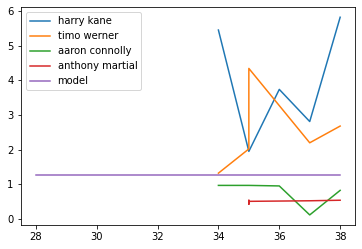

In [54]:
hold_df=hold_test.copy()
plt.plot(hold_df[hold_df['name']=='harry kane']['GW'],np.abs(hold_df[hold_df['name']=='harry kane']['y_pred']-hold_df[hold_df['name']=='harry kane']['y_test']),label='harry kane')
plt.plot(hold_df[hold_df['name']=='timo werner']['GW'],np.abs(hold_df[hold_df['name']=='timo werner']['y_pred']-hold_df[hold_df['name']=='timo werner']['y_test']),label='timo werner')
plt.plot(hold_df[hold_df['name']=='aaron connolly']['GW'],np.abs(hold_df[hold_df['name']=='aaron connolly']['y_pred']-hold_df[hold_df['name']=='aaron connolly']['y_test']),label='aaron connolly')
plt.plot(hold_df[hold_df['name']=='anthony martial']['GW'],np.abs(hold_df[hold_df['name']=='anthony martial']['y_pred']-hold_df[hold_df['name']=='anthony martial']['y_test']),label='anthony martial')
plt.plot([28,30,32,34,36,38],[1.2592478095185238,1.2592478095185238,1.2592478095185238,1.2592478095185238,1.2592478095185238,1.2592478095185238],label='model')
plt.legend()

In [55]:
hold_df[hold_df['GW']==28].sort_values(by='y_pred',ascending=False).head(5)

,name,GW,season,y_pred,y_test


In [56]:
hold_df[hold_df['GW']==28].sort_values(by='y_test',ascending=False).head(5)

,name,GW,season,y_pred,y_test


In [57]:
GW_list=[35,36,37,38]
top_predicted_fwd=hold_df[hold_df['GW']==34].sort_values(by='y_pred',ascending=False).head(3)
for GW in GW_list:
    df1=hold_df[hold_df['GW']==GW].sort_values(by='y_pred',ascending=False).head(3)
    top_predicted_fwd=pd.concat([top_predicted_fwd,df1])
top_predicted_fwd


GW_list=[35,36,37,38]
top_actual_fwd=hold_df[hold_df['GW']==34].sort_values(by='y_test',ascending=False).head(3)
for GW in GW_list:
    df1=hold_df[hold_df['GW']==GW].sort_values(by='y_test',ascending=False).head(3)
    top_actual_fwd=pd.concat([top_actual_fwd,df1])
top_actual_fwd

,name,GW,season,y_pred,y_test
328,michail antonio,34,21,0.590040,13
125,danny welbeck,34,21,3.147722,12
140,dominic calvert-lewin,34,21,2.046661,8
402,roberto firmino,35,21,3.541645,13
64,callum wilson,35,21,2.278475,13
121,danny ings,35,21,2.298090,13
408,rodrigo moreno,36,21,1.821796,12
86,che adams,36,21,3.602758,9
127,danny welbeck,36,21,2.668449,9
378,patrick bamford,37,21,3.350019,12


### KNN

In [58]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']

In [59]:
X_train

,assists,bps,goals_scored,ict_index,minutes,selected,rolling_points,transfers_balance,value,penalties_missed,cards,was_home,opponent_level,team_level,time
0,0.000000,1.000000,0.000000,1.566667e+00,16.666667,12277.666667,1.000000,6226.333333,45.000000,0.0,0.0,0,1220.0,1010.0,14
1,0.000000,1.333333,0.000000,1.600000e+00,17.000000,23177.333333,1.000000,9038.666667,45.000000,0.0,0.0,1,1240.0,1050.0,11
2,0.000000,18.666667,0.666667,7.566667e+00,41.333333,30176.333333,5.000000,6227.666667,45.000000,0.0,0.0,0,1020.0,1010.0,14
3,0.000000,19.333333,0.666667,7.933333e+00,49.666667,59556.333333,5.000000,27131.666667,45.000000,0.0,0.0,1,1240.0,1050.0,14
4,0.666667,26.000000,0.666667,7.966667e+00,67.666667,97405.666667,7.333333,35975.666667,45.333333,0.0,0.0,1,1020.0,1050.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,0.000000,0.000000,0.000000,8.881784e-15,0.000000,7082.666667,0.000000,-47.333333,48.000000,0.0,0.0,1,1110.0,1050.0,20
5249,0.000000,0.000000,0.000000,8.881784e-15,0.000000,7033.000000,0.000000,-49.666667,48.000000,0.0,0.0,0,1050.0,1070.0,12
5250,0.000000,0.000000,0.000000,8.881784e-15,0.000000,6994.000000,0.000000,-39.333333,48.000000,0.0,0.0,1,1160.0,1050.0,20
5251,0.000000,0.000000,0.000000,8.881784e-15,0.000000,6961.666667,0.000000,-32.333333,48.000000,0.0,0.0,0,1130.0,1070.0,20


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

result=cross_val_score(reg, X_train, y_train).mean()

result


0.11958485352570562

In [62]:
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.2436123348017618

### Neural network

In [63]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']

In [64]:
X_train

,assists,bps,goals_scored,ict_index,minutes,selected,rolling_points,transfers_balance,value,penalties_missed,cards,was_home,opponent_level,team_level,time
0,0.000000,1.000000,0.000000,1.566667e+00,16.666667,12277.666667,1.000000,6226.333333,45.000000,0.0,0.0,0,1220.0,1010.0,14
1,0.000000,1.333333,0.000000,1.600000e+00,17.000000,23177.333333,1.000000,9038.666667,45.000000,0.0,0.0,1,1240.0,1050.0,11
2,0.000000,18.666667,0.666667,7.566667e+00,41.333333,30176.333333,5.000000,6227.666667,45.000000,0.0,0.0,0,1020.0,1010.0,14
3,0.000000,19.333333,0.666667,7.933333e+00,49.666667,59556.333333,5.000000,27131.666667,45.000000,0.0,0.0,1,1240.0,1050.0,14
4,0.666667,26.000000,0.666667,7.966667e+00,67.666667,97405.666667,7.333333,35975.666667,45.333333,0.0,0.0,1,1020.0,1050.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,0.000000,0.000000,0.000000,8.881784e-15,0.000000,7082.666667,0.000000,-47.333333,48.000000,0.0,0.0,1,1110.0,1050.0,20
5249,0.000000,0.000000,0.000000,8.881784e-15,0.000000,7033.000000,0.000000,-49.666667,48.000000,0.0,0.0,0,1050.0,1070.0,12
5250,0.000000,0.000000,0.000000,8.881784e-15,0.000000,6994.000000,0.000000,-39.333333,48.000000,0.0,0.0,1,1160.0,1050.0,20
5251,0.000000,0.000000,0.000000,8.881784e-15,0.000000,6961.666667,0.000000,-32.333333,48.000000,0.0,0.0,0,1130.0,1070.0,20


In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Midfielders

In [66]:
mid_features=['name','assists','bps','clean_sheets','creativity','goals_conceded','goals_scored','ict_index',
              'influence','kickoff_time','minutes','penalties_missed','red_cards','selected',
              'threat','total_points','transfers_balance','value','was_home','yellow_cards','GW',
              'season','opponent_level','team_level']

In [67]:
mid_train=mid_df_train[mid_features]
mid_test=mid_df_test[mid_features]

In [68]:
mid_train['cards']=mid_train['yellow_cards']+mid_train['red_cards']
mid_test['cards']=mid_test['yellow_cards']+mid_test['red_cards']



<ipython-input-68-acb516f42b05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_train['cards']=mid_train['yellow_cards']+mid_train['red_cards']
<ipython-input-68-acb516f42b05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_test['cards']=mid_test['yellow_cards']+mid_test['red_cards']


In [69]:
mid_train.columns

Index(['name', 'assists', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'penalties_missed', 'red_cards', 'selected',
       'threat', 'total_points', 'transfers_balance', 'value', 'was_home',
       'yellow_cards', 'GW', 'season', 'opponent_level', 'team_level',
       'cards'],
      dtype='object')

In [70]:
rolling_features=['name','assists','bps','clean_sheets','creativity','goals_conceded','goals_scored','ict_index','influence',
                  'minutes','selected','threat','total_points','transfers_balance','value','penalties_missed','cards']

static_features=['kickoff_time','was_home','GW','season','opponent_level','team_level']



total_points_train=mid_train['total_points']
total_points_test=mid_test['total_points']




## Rolling Features

In [71]:
rolling_df_train=mid_train[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()
rolling_df_test=mid_test[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()


In [72]:
rolling_df_train.rename(columns={'total_points':'rolling_points'},inplace=True)
rolling_df_test.rename(columns={'total_points':'rolling_points'},inplace=True)

In [73]:

result = map(lambda position:position, total_points_train)
rolling_df_train['total_points']=list(result)

result = map(lambda position:position, total_points_test)
rolling_df_test['total_points']=list(result)

In [74]:
rolling_df_train.head()

assists  bps  clean_sheets  creativity  goals_conceded  \
name                                                                       
aaron lennon 263      NaN  NaN           NaN         NaN             NaN   
             264      NaN  NaN           NaN         NaN             NaN   
             265      NaN  NaN           NaN         NaN             NaN   
             266      0.0  2.0           0.0         0.1             0.0   
             267      0.0  0.0           0.0         0.0             0.0   

                  goals_scored  ict_index  influence  minutes      selected  \
name                                                                          
aaron lennon 263           NaN        NaN        NaN      NaN           NaN   
             264           NaN        NaN        NaN      NaN           NaN   
             265           NaN        NaN        NaN      NaN           NaN   
             266           0.0        0.3   2.733333      5.0  13245.666667   
             267           0.0        0.0   0.000000      0.0  12175.000000   

                  threat  rolling_points  transfers_balance      value  \
name                                                                     
aaron lennon 263     NaN             NaN                NaN        NaN   
             264     NaN             NaN                NaN        NaN   
             265     NaN             NaN                NaN        NaN   
             266     0.0        0.333333            -1310.0  59.666667   
             267     0.0        0.000000            -1898.0  59.000000   

                  penalties_missed  cards  total_points  
name                                                     
aaron lennon 263               NaN    NaN             1  
             264               NaN    NaN             0  
             265               NaN    NaN             0  
             266               0.0    0.0             0  
             267               0.0    0.0             0

In [75]:
for i in static_features:
    result = map(lambda position:position, mid_train[i])
    rolling_df_train[i]=list(result)
for i in static_features:
    result = map(lambda position:position, mid_test[i])
    rolling_df_test[i]=list(result)



In [76]:
rolling_df_train.head()

assists  bps  clean_sheets  creativity  goals_conceded  \
name                                                                       
aaron lennon 263      NaN  NaN           NaN         NaN             NaN   
             264      NaN  NaN           NaN         NaN             NaN   
             265      NaN  NaN           NaN         NaN             NaN   
             266      0.0  2.0           0.0         0.1             0.0   
             267      0.0  0.0           0.0         0.0             0.0   

                  goals_scored  ict_index  influence  minutes      selected  \
name                                                                          
aaron lennon 263           NaN        NaN        NaN      NaN           NaN   
             264           NaN        NaN        NaN      NaN           NaN   
             265           NaN        NaN        NaN      NaN           NaN   
             266           0.0        0.3   2.733333      5.0  13245.666667   
             267           0.0        0.0   0.000000      0.0  12175.000000   

                  ...      value  penalties_missed  cards  total_points  \
name              ...                                                     
aaron lennon 263  ...        NaN               NaN    NaN             1   
             264  ...        NaN               NaN    NaN             0   
             265  ...        NaN               NaN    NaN             0   
             266  ...  59.666667               0.0    0.0             0   
             267  ...  59.000000               0.0    0.0             0   

                  kickoff_time  was_home  GW season  opponent_level  \
name                                                                  
aaron lennon 263      14:00:00      True   1     17             NaN   
             264      14:00:00     False   2     17             NaN   
             265      14:00:00      True   3     17             NaN   
             266      19:00:00     False   4     17             NaN   
             267      16:30:00      True   5     17             NaN   

                  team_level  
name                          
aaron lennon 263         NaN  
             264         NaN  
             265         NaN  
             266         NaN  
             267         NaN  

[5 rows x 23 columns]

In [77]:
rolling_df_train.dropna(inplace=True)
rolling_df_test.dropna(inplace=True)

In [78]:
rolling_df_train.isnull().sum().sort_values(ascending=False)

assists              0
transfers_balance    0
opponent_level       0
season               0
GW                   0
was_home             0
kickoff_time         0
total_points         0
cards                0
penalties_missed     0
value                0
rolling_points       0
bps                  0
threat               0
selected             0
minutes              0
influence            0
ict_index            0
goals_scored         0
goals_conceded       0
creativity           0
clean_sheets         0
team_level           0
dtype: int64

In [79]:
rolling_df_train.drop(columns=['creativity','influence','threat'],inplace=True)
rolling_df_test.drop(columns=['creativity','influence','threat'],inplace=True)

In [80]:
time=[]
for row in rolling_df_train['kickoff_time']:
    time.append(row.hour)
rolling_df_train['time']=time

time=[]
for row in rolling_df_test['kickoff_time']:
    time.append(row.hour)
rolling_df_test['time']=time

In [81]:
rolling_df_train.drop(columns='kickoff_time',inplace=True)
rolling_df_test.drop(columns='kickoff_time',inplace=True)

In [82]:
rolling_df_train.columns

Index(['assists', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored',
       'ict_index', 'minutes', 'selected', 'rolling_points',
       'transfers_balance', 'value', 'penalties_missed', 'cards',
       'total_points', 'was_home', 'GW', 'season', 'opponent_level',
       'team_level', 'time'],
      dtype='object')

In [83]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(rolling_df_train[['was_home']])
rolling_df_train['was_home'] = encoder.transform(rolling_df_train[['was_home']])

encoder = LabelEncoder()
encoder.fit(rolling_df_test[['was_home']])
rolling_df_test['was_home'] = encoder.transform(rolling_df_test[['was_home']])

/Users/admin/.pyenv/versions/3.8.6/envs/fflpred/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [84]:
rolling_df_train=rolling_df_train.reset_index()
rolling_df_test=rolling_df_test.reset_index()


In [85]:
rolling_df_train.head()

,name,level_1,assists,bps,clean_sheets,goals_conceded,goals_scored,ict_index,minutes,selected,...,value,penalties_missed,cards,total_points,was_home,GW,season,opponent_level,team_level,time
0,aaron lennon,377,0.0,0.000000,0.0,0.000000,0.0,5.921189e-16,0.0,18824.666667,...,49.000000,0.0,0.000000,1,1,1,20,1040.0,1110.0,14
1,aaron lennon,378,0.0,1.000000,0.0,0.000000,0.0,6.666667e-02,2.0,15226.000000,...,49.333333,0.0,0.000000,1,0,2,20,1180.0,1180.0,11
2,aaron lennon,379,0.0,2.333333,0.0,0.000000,0.0,2.000000e-01,8.0,11863.333333,...,49.666667,0.0,0.000000,0,0,3,20,1230.0,1180.0,15
3,aaron lennon,380,0.0,2.666667,0.0,0.333333,0.0,3.000000e-01,16.0,8281.333333,...,49.666667,0.0,0.333333,2,1,4,20,1350.0,1110.0,16
4,aaron lennon,381,0.0,4.000000,0.0,1.333333,0.0,4.000000e-01,44.0,8071.333333,...,49.333333,0.0,0.333333,0,0,5,20,1050.0,1180.0,14


In [86]:
hold_train=rolling_df_train[['name','GW','season']]
hold_test=rolling_df_test[['name','GW','season']]

rolling_df_train.drop(columns=['name','GW','season','level_1'],inplace=True)
rolling_df_test.drop(columns=['name','GW','season','level_1'],inplace=True)

In [87]:
rolling_df_train.head()

,assists,bps,clean_sheets,goals_conceded,goals_scored,ict_index,minutes,selected,rolling_points,transfers_balance,value,penalties_missed,cards,total_points,was_home,opponent_level,team_level,time
0,0.0,0.000000,0.0,0.000000,0.0,5.921189e-16,0.0,18824.666667,0.000000,-85.000000,49.000000,0.0,0.000000,1,1,1040.0,1110.0,14
1,0.0,1.000000,0.0,0.000000,0.0,6.666667e-02,2.0,15226.000000,0.333333,-52.666667,49.333333,0.0,0.000000,1,0,1180.0,1180.0,11
2,0.0,2.333333,0.0,0.000000,0.0,2.000000e-01,8.0,11863.333333,0.666667,-310.666667,49.666667,0.0,0.000000,0,0,1230.0,1180.0,15
3,0.0,2.666667,0.0,0.333333,0.0,3.000000e-01,16.0,8281.333333,0.666667,-651.333333,49.666667,0.0,0.333333,2,1,1350.0,1110.0,16
4,0.0,4.000000,0.0,1.333333,0.0,4.000000e-01,44.0,8071.333333,1.000000,-935.333333,49.333333,0.0,0.333333,0,0,1050.0,1180.0,14


In [88]:
rolling_df_train.columns

Index(['assists', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored',
       'ict_index', 'minutes', 'selected', 'rolling_points',
       'transfers_balance', 'value', 'penalties_missed', 'cards',
       'total_points', 'was_home', 'opponent_level', 'team_level', 'time'],
      dtype='object')

In [89]:
rolling_df_train.shape

(16276, 18)

## Models for the midfielders

### Gradient Boosting

In [90]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

In [91]:
y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']


In [92]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

reg = GradientBoostingRegressor(random_state=0,loss='ls')
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.0225059303125743

In [93]:
result=cross_val_score(reg, X_train, y_train).mean()

result

0.258756508924579

In [94]:
hold_test['y_pred']=y_pred

<ipython-input-94-9c4b9cdd679b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_pred']=y_pred


In [95]:
hold_test['y_test']=y_test

<ipython-input-95-088461d3fca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_test']=y_test


In [96]:
hold_test[hold_test['name']=='paul pogba']

,name,GW,season,y_pred,y_test
1107,paul pogba,35,21,3.363465,5
1108,paul pogba,35,21,2.469348,0
1109,paul pogba,35,21,2.248831,2
1110,paul pogba,37,21,4.878253,2
1111,paul pogba,38,21,2.671378,0


In [97]:
hold_test[hold_test['name']=='harry winks']

,name,GW,season,y_pred,y_test
461,harry winks,34,21,0.680952,1
462,harry winks,35,21,0.960021,0
463,harry winks,36,21,1.031078,1
464,harry winks,37,21,1.031078,2
465,harry winks,38,21,0.941621,1


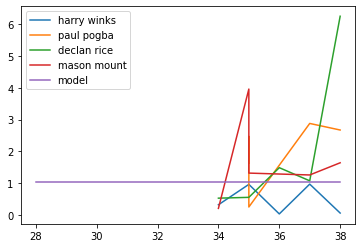

In [98]:
hold_df=hold_test.copy()
plt.plot(hold_df[hold_df['name']=='harry winks']['GW'],np.abs(hold_df[hold_df['name']=='harry winks']['y_pred']-hold_df[hold_df['name']=='harry winks']['y_test']),label='harry winks')
plt.plot(hold_df[hold_df['name']=='paul pogba']['GW'],np.abs(hold_df[hold_df['name']=='paul pogba']['y_pred']-hold_df[hold_df['name']=='paul pogba']['y_test']),label='paul pogba')
plt.plot(hold_df[hold_df['name']=='declan rice']['GW'],np.abs(hold_df[hold_df['name']=='declan rice']['y_pred']-hold_df[hold_df['name']=='declan rice']['y_test']),label='declan rice')
plt.plot(hold_df[hold_df['name']=='mason mount']['GW'],np.abs(hold_df[hold_df['name']=='mason mount']['y_pred']-hold_df[hold_df['name']=='mason mount']['y_test']),label='mason mount')
plt.plot([28,30,32,34,36,38],[1.046823268074249,1.046823268074249,1.046823268074249,1.046823268074249,1.046823268074249,1.046823268074249],label='model')
plt.legend()

In [99]:
hold_df[hold_df['GW']==38].sort_values(by='y_pred',ascending=False).head(5)

,name,GW,season,y_pred,y_test
990,mohamed salah,38,21,7.444237,6
1130,pierre-emerick aubameyang,38,21,5.215265,3
195,bruno miguel borges fernandes,38,21,5.170251,0
1215,sadio mané,38,21,5.060070,16
541,jack harrison,38,21,4.714583,5


In [100]:
hold_df[hold_df['GW']==38].sort_values(by='y_test',ascending=False).head(5)

,name,GW,season,y_pred,y_test
1096,pablo fornals,38,21,3.678157,19
1215,sadio mané,38,21,5.060070,16
1061,nicolas pépé,38,21,3.563928,16
175,bertrand traoré,38,21,2.860577,13
795,kevin de bruyne,38,21,0.447481,13


In [101]:
GW_list=[35,36,37,38]
top_predicted_mid=hold_df[hold_df['GW']==34].sort_values(by='y_pred',ascending=False).head(5)
for GW in GW_list:
    df1=hold_df[hold_df['GW']==GW].sort_values(by='y_pred',ascending=False).head(5)
    top_predicted_mid=pd.concat([top_predicted_mid,df1])
top_predicted_mid


GW_list=[35,36,37,38]
top_actual_mid=hold_df[hold_df['GW']==34].sort_values(by='y_test',ascending=False).head(5)
for GW in GW_list:
    df1=hold_df[hold_df['GW']==GW].sort_values(by='y_test',ascending=False).head(5)
    top_actual_mid=pd.concat([top_actual_mid,df1])
top_actual_mid

,name,GW,season,y_pred,y_test
406,gareth bale,34,21,3.797842,21
771,kai havertz,34,21,4.078725,16
1126,pierre-emerick aubameyang,34,21,0.582917,12
482,heung-min son,34,21,6.075437,12
981,mohamed naser el sayed elneny,34,21,0.819089,11
330,eberechi eze,35,21,2.657198,14
342,emile smith rowe,35,21,1.854771,11
1211,sadio mané,35,21,4.767796,11
139,ashley westwood,35,21,2.761210,10
997,morgan gibbs-white,35,21,1.025239,10


### KNN

In [102]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']

In [103]:
X_train

,assists,bps,clean_sheets,goals_conceded,goals_scored,ict_index,minutes,selected,rolling_points,transfers_balance,value,penalties_missed,cards,was_home,opponent_level,team_level,time
0,0.0,0.000000,0.0,0.000000,0.0,5.921189e-16,0.0,18824.666667,0.000000,-85.000000,49.000000,0.0,0.000000,1,1040.0,1110.0,14
1,0.0,1.000000,0.0,0.000000,0.0,6.666667e-02,2.0,15226.000000,0.333333,-52.666667,49.333333,0.0,0.000000,0,1180.0,1180.0,11
2,0.0,2.333333,0.0,0.000000,0.0,2.000000e-01,8.0,11863.333333,0.666667,-310.666667,49.666667,0.0,0.000000,0,1230.0,1180.0,15
3,0.0,2.666667,0.0,0.333333,0.0,3.000000e-01,16.0,8281.333333,0.666667,-651.333333,49.666667,0.0,0.333333,1,1350.0,1110.0,16
4,0.0,4.000000,0.0,1.333333,0.0,4.000000e-01,44.0,8071.333333,1.000000,-935.333333,49.333333,0.0,0.333333,0,1050.0,1180.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16271,0.0,0.000000,0.0,0.000000,0.0,1.450691e-14,0.0,175.666667,0.000000,82.000000,45.000000,0.0,0.000000,1,1210.0,1000.0,19
16272,0.0,0.000000,0.0,0.000000,0.0,1.450691e-14,0.0,237.333333,0.000000,38.666667,45.000000,0.0,0.000000,1,1160.0,1000.0,18
16273,0.0,0.000000,0.0,0.000000,0.0,1.450691e-14,0.0,259.000000,0.000000,-27.000000,45.000000,0.0,0.000000,1,1100.0,1000.0,15
16274,0.0,0.000000,0.0,0.000000,0.0,1.450691e-14,0.0,242.666667,0.000000,-65.333333,45.000000,0.0,0.000000,0,1240.0,1040.0,14


In [104]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

result=cross_val_score(reg, X_train, y_train).mean()

result


0.11322777218983619

In [106]:
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.117945109078114

# Defenders

In [107]:
def_features=['name','assists','bps','clean_sheets','creativity','goals_conceded','goals_scored',
              'ict_index','influence','kickoff_time','minutes','penalties_missed','red_cards',
              'selected','threat','total_points','transfers_balance','value','was_home',
              'yellow_cards','GW','season','opponent_level','team_level']

In [108]:
def_train=def_df_train[def_features]
def_test=def_df_test[def_features]

In [109]:
def_train['cards']=def_train['yellow_cards']+def_train['red_cards']
def_test['cards']=def_test['yellow_cards']+def_test['red_cards']



<ipython-input-109-d5f3f02e812a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_train['cards']=def_train['yellow_cards']+def_train['red_cards']
<ipython-input-109-d5f3f02e812a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_test['cards']=def_test['yellow_cards']+def_test['red_cards']


In [110]:
def_train.columns

Index(['name', 'assists', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'penalties_missed', 'red_cards', 'selected',
       'threat', 'total_points', 'transfers_balance', 'value', 'was_home',
       'yellow_cards', 'GW', 'season', 'opponent_level', 'team_level',
       'cards'],
      dtype='object')

In [111]:
rolling_features=['name','assists','bps','clean_sheets','creativity','goals_conceded','goals_scored','ict_index','influence',
                  'minutes','selected','threat','total_points','transfers_balance','value','cards']

static_features=['kickoff_time','was_home','GW','season','opponent_level','team_level']



total_points_train=def_train['total_points']
total_points_test=def_test['total_points']




## Rolling features

In [112]:
rolling_df_train=def_train[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()
rolling_df_test=def_test[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()


In [113]:
rolling_df_train.rename(columns={'total_points':'rolling_points'},inplace=True)
rolling_df_test.rename(columns={'total_points':'rolling_points'},inplace=True)

In [114]:

result = map(lambda position:position, total_points_train)
rolling_df_train['total_points']=list(result)

result = map(lambda position:position, total_points_test)
rolling_df_test['total_points']=list(result)

In [115]:
rolling_df_train.head()

assists  bps  clean_sheets  creativity  goals_conceded  \
name                                                                         
aaron cresswell 73      NaN  NaN           NaN         NaN             NaN   
                74      NaN  NaN           NaN         NaN             NaN   
                75      NaN  NaN           NaN         NaN             NaN   
                76      0.0  0.0           0.0         0.0             0.0   
                77      0.0  0.0           0.0         0.0             0.0   

                    goals_scored  ict_index  influence  minutes      selected  \
name                                                                            
aaron cresswell 73           NaN        NaN        NaN      NaN           NaN   
                74           NaN        NaN        NaN      NaN           NaN   
                75           NaN        NaN        NaN      NaN           NaN   
                76           0.0        0.0        0.0      0.0  11713.666667   
                77           0.0        0.0        0.0      0.0   9848.333333   

                    threat  rolling_points  transfers_balance      value  \
name                                                                       
aaron cresswell 73     NaN             NaN                NaN        NaN   
                74     NaN             NaN                NaN        NaN   
                75     NaN             NaN                NaN        NaN   
                76     0.0             0.0            -1685.0  54.666667   
                77     0.0             0.0            -2092.0  54.333333   

                    cards  total_points  
name                                     
aaron cresswell 73    NaN             0  
                74    NaN             0  
                75    NaN             0  
                76    0.0             0  
                77    0.0             0

In [116]:
for i in static_features:
    result = map(lambda position:position, def_train[i])
    rolling_df_train[i]=list(result)
for i in static_features:
    result = map(lambda position:position, def_test[i])
    rolling_df_test[i]=list(result)



In [117]:
rolling_df_train.head()

assists  bps  clean_sheets  creativity  goals_conceded  \
name                                                                         
aaron cresswell 73      NaN  NaN           NaN         NaN             NaN   
                74      NaN  NaN           NaN         NaN             NaN   
                75      NaN  NaN           NaN         NaN             NaN   
                76      0.0  0.0           0.0         0.0             0.0   
                77      0.0  0.0           0.0         0.0             0.0   

                    goals_scored  ict_index  influence  minutes      selected  \
name                                                                            
aaron cresswell 73           NaN        NaN        NaN      NaN           NaN   
                74           NaN        NaN        NaN      NaN           NaN   
                75           NaN        NaN        NaN      NaN           NaN   
                76           0.0        0.0        0.0      0.0  11713.666667   
                77           0.0        0.0        0.0      0.0   9848.333333   

                    ...  transfers_balance      value  cards  total_points  \
name                ...                                                      
aaron cresswell 73  ...                NaN        NaN    NaN             0   
                74  ...                NaN        NaN    NaN             0   
                75  ...                NaN        NaN    NaN             0   
                76  ...            -1685.0  54.666667    0.0             0   
                77  ...            -2092.0  54.333333    0.0             0   

                    kickoff_time  was_home GW  season  opponent_level  \
name                                                                    
aaron cresswell 73      19:00:00     False  1      17             NaN   
                74      15:00:00      True  2      17             NaN   
                75      15:00:00     False  3      17             NaN   
                76      14:00:00      True  4      17             NaN   
                77      14:00:00     False  5      17             NaN   

                    team_level  
name                            
aaron cresswell 73         NaN  
                74         NaN  
                75         NaN  
                76         NaN  
                77         NaN  

[5 rows x 22 columns]

In [118]:
rolling_df_train.dropna(inplace=True)
rolling_df_test.dropna(inplace=True)

In [119]:
rolling_df_train.isnull().sum().sort_values(ascending=False)

assists              0
bps                  0
opponent_level       0
season               0
GW                   0
was_home             0
kickoff_time         0
total_points         0
cards                0
value                0
transfers_balance    0
rolling_points       0
threat               0
selected             0
minutes              0
influence            0
ict_index            0
goals_scored         0
goals_conceded       0
creativity           0
clean_sheets         0
team_level           0
dtype: int64

In [120]:
rolling_df_train.drop(columns=['creativity','influence','threat'],inplace=True)
rolling_df_test.drop(columns=['creativity','influence','threat'],inplace=True)

In [121]:
time=[]
for row in rolling_df_train['kickoff_time']:
    time.append(row.hour)
rolling_df_train['time']=time

time=[]
for row in rolling_df_test['kickoff_time']:
    time.append(row.hour)
rolling_df_test['time']=time

In [122]:
rolling_df_train.drop(columns='kickoff_time',inplace=True)
rolling_df_test.drop(columns='kickoff_time',inplace=True)

In [123]:
rolling_df_train.columns

Index(['assists', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored',
       'ict_index', 'minutes', 'selected', 'rolling_points',
       'transfers_balance', 'value', 'cards', 'total_points', 'was_home', 'GW',
       'season', 'opponent_level', 'team_level', 'time'],
      dtype='object')

In [124]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(rolling_df_train[['was_home']])
rolling_df_train['was_home'] = encoder.transform(rolling_df_train[['was_home']])

encoder = LabelEncoder()
encoder.fit(rolling_df_test[['was_home']])
rolling_df_test['was_home'] = encoder.transform(rolling_df_test[['was_home']])

/Users/admin/.pyenv/versions/3.8.6/envs/fflpred/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [125]:
rolling_df_train=rolling_df_train.reset_index()
rolling_df_test=rolling_df_test.reset_index()


In [126]:
rolling_df_train.head()

,name,level_1,assists,bps,clean_sheets,goals_conceded,goals_scored,ict_index,minutes,selected,...,transfers_balance,value,cards,total_points,was_home,GW,season,opponent_level,team_level,time
0,aaron cresswell,187,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,33443.000000,...,-399.666667,50.000000,0.0,0,1,1,20,1340.0,1040.0,11
1,aaron cresswell,188,0.0,2.333333,0.0,1.666667,0.0,0.366667,30.0,30007.000000,...,-166.000000,50.000000,0.0,0,0,2,20,1050.0,1030.0,14
2,aaron cresswell,189,0.0,2.333333,0.0,1.666667,0.0,0.366667,30.0,27892.666667,...,-406.666667,50.000000,0.0,0,0,3,20,1030.0,1030.0,14
3,aaron cresswell,190,0.0,2.333333,0.0,1.666667,0.0,0.366667,30.0,24951.000000,...,-1434.666667,50.000000,0.0,0,1,4,20,1020.0,1040.0,14
4,aaron cresswell,191,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,24891.333333,...,-2110.000000,49.666667,0.0,0,0,5,20,1020.0,1030.0,19


In [127]:
hold_train=rolling_df_train[['name','GW','season']]
hold_test=rolling_df_test[['name','GW','season']]

rolling_df_train.drop(columns=['name','GW','season','level_1'],inplace=True)
rolling_df_test.drop(columns=['name','GW','season','level_1'],inplace=True)

In [128]:
rolling_df_train.head()

,assists,bps,clean_sheets,goals_conceded,goals_scored,ict_index,minutes,selected,rolling_points,transfers_balance,value,cards,total_points,was_home,opponent_level,team_level,time
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,33443.000000,0.0,-399.666667,50.000000,0.0,0,1,1340.0,1040.0,11
1,0.0,2.333333,0.0,1.666667,0.0,0.366667,30.0,30007.000000,0.0,-166.000000,50.000000,0.0,0,0,1050.0,1030.0,14
2,0.0,2.333333,0.0,1.666667,0.0,0.366667,30.0,27892.666667,0.0,-406.666667,50.000000,0.0,0,0,1030.0,1030.0,14
3,0.0,2.333333,0.0,1.666667,0.0,0.366667,30.0,24951.000000,0.0,-1434.666667,50.000000,0.0,0,1,1020.0,1040.0,14
4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,24891.333333,0.0,-2110.000000,49.666667,0.0,0,0,1020.0,1030.0,19


In [129]:
rolling_df_train.columns

Index(['assists', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored',
       'ict_index', 'minutes', 'selected', 'rolling_points',
       'transfers_balance', 'value', 'cards', 'total_points', 'was_home',
       'opponent_level', 'team_level', 'time'],
      dtype='object')

In [130]:
rolling_df_train.shape

(13959, 17)

## Models for the defenders

### Gradient boosting

In [131]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

In [132]:
y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']


In [133]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

reg = GradientBoostingRegressor(random_state=0,loss='ls')
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.1401085534417374

In [134]:
result=cross_val_score(reg, X_train, y_train).mean()

result

0.2254479732898731

In [135]:
hold_test['y_pred']=y_pred

<ipython-input-135-9c4b9cdd679b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_pred']=y_pred


In [136]:
hold_test['y_test']=y_test

<ipython-input-136-088461d3fca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_test']=y_test


In [137]:
hold_test[hold_test['name']=='aaron cresswell']

,name,GW,season,y_pred,y_test
0,aaron cresswell,34,21,1.111306,2
1,aaron cresswell,35,21,2.621372,1
2,aaron cresswell,36,21,1.651889,3
3,aaron cresswell,37,21,3.086858,5
4,aaron cresswell,38,21,3.650930,6


In [138]:
hold_test[hold_test['name']=='benjamin chilwell']

,name,GW,season,y_pred,y_test
148,benjamin chilwell,34,21,3.264894,6
149,benjamin chilwell,35,21,1.781086,0
150,benjamin chilwell,35,21,2.791032,2
151,benjamin chilwell,37,21,2.705192,5
152,benjamin chilwell,38,21,2.384942,8


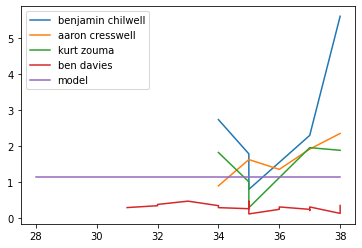

In [139]:
hold_df=hold_test.copy()
plt.plot(hold_df[hold_df['name']=='benjamin chilwell']['GW'],np.abs(hold_df[hold_df['name']=='benjamin chilwell']['y_pred']-hold_df[hold_df['name']=='benjamin chilwell']['y_test']),label='benjamin chilwell')
plt.plot(hold_df[hold_df['name']=='aaron cresswell']['GW'],np.abs(hold_df[hold_df['name']=='aaron cresswell']['y_pred']-hold_df[hold_df['name']=='aaron cresswell']['y_test']),label='aaron cresswell')
plt.plot(hold_df[hold_df['name']=='kurt zouma']['GW'],np.abs(hold_df[hold_df['name']=='kurt zouma']['y_pred']-hold_df[hold_df['name']=='kurt zouma']['y_test']),label='kurt zouma')
plt.plot(hold_df[hold_df['name']=='ben davies']['GW'],np.abs(hold_df[hold_df['name']=='ben davies']['y_pred']-hold_df[hold_df['name']=='ben davies']['y_test']),label='ben davies')
plt.plot([28,30,32,34,36,38],[1.1492831245394917,1.1492831245394917,1.1492831245394917,1.1492831245394917,1.1492831245394917,1.1492831245394917],label='model')
plt.legend()

In [140]:
hold_df[hold_df['GW']==31].sort_values(by='y_pred',ascending=False).head(5)

,name,GW,season,y_pred,y_test
93,ben davies,31,21,0.283557,0


In [141]:
hold_df[hold_df['GW']==31].sort_values(by='y_test',ascending=False).head(5)

,name,GW,season,y_pred,y_test
93,ben davies,31,21,0.283557,0


In [142]:
GW_list=[35,36,37,38]
top_predicted_def=hold_df[hold_df['GW']==34].sort_values(by='y_pred',ascending=False).head(5)
for GW in GW_list:
    df1=hold_df[hold_df['GW']==GW].sort_values(by='y_pred',ascending=False).head(5)
    top_predicted_def=pd.concat([top_predicted_def,df1])
top_predicted_def


GW_list=[35,36,37,38]
top_actual_def=hold_df[hold_df['GW']==34].sort_values(by='y_test',ascending=False).head(5)
for GW in GW_list:
    df1=hold_df[hold_df['GW']==GW].sort_values(by='y_test',ascending=False).head(5)
    top_actual_def=pd.concat([top_actual_def,df1])
top_actual_def

,name,GW,season,y_pred,y_test
1066,serge aurier,34,21,2.974589,14
591,jonny evans,34,21,3.121507,10
446,héctor bellerín,34,21,1.057925,8
45,andreas christensen,34,21,3.151537,8
886,nélson cabral semedo,34,21,2.642611,8
128,ben godfrey,35,21,2.156109,12
1216,çaglar söyüncü,35,21,2.370042,11
426,gary cahill,35,21,1.314060,11
1092,stuart dallas,35,21,3.525919,9
503,james tarkowski,35,21,3.095523,9


In [361]:
top_predicted_def

,name,GW,season,y_pred,y_test
1123,timothy castagne,34,21,3.958717,2
69,antonio rüdiger,34,21,3.828786,0
724,lucas digne,34,21,3.774791,7
127,ben godfrey,34,21,3.616565,1
1000,romain saïss,34,21,3.565200,2
50,andrew robertson,35,21,4.730077,6
1142,trent alexander-arnold,35,21,4.525743,7
787,matt targett,35,21,4.124356,7
1143,trent alexander-arnold,35,21,4.110863,9
726,lucas digne,35,21,3.924773,8


### KNN

In [143]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']

In [144]:
X_train

,assists,bps,clean_sheets,goals_conceded,goals_scored,ict_index,minutes,selected,rolling_points,transfers_balance,value,cards,was_home,opponent_level,team_level,time
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,33443.000000,0.000000,-399.666667,50.000000,0.000000,1,1340.0,1040.0,11
1,0.0,2.333333,0.000000,1.666667,0.0,0.366667,30.0,30007.000000,0.000000,-166.000000,50.000000,0.000000,0,1050.0,1030.0,14
2,0.0,2.333333,0.000000,1.666667,0.0,0.366667,30.0,27892.666667,0.000000,-406.666667,50.000000,0.000000,0,1030.0,1030.0,14
3,0.0,2.333333,0.000000,1.666667,0.0,0.366667,30.0,24951.000000,0.000000,-1434.666667,50.000000,0.000000,1,1020.0,1040.0,14
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,24891.333333,0.000000,-2110.000000,49.666667,0.000000,0,1020.0,1030.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13954,0.0,17.666667,0.333333,0.666667,0.0,2.633333,90.0,220138.000000,3.000000,4724.666667,53.000000,0.333333,1,1250.0,1240.0,12
13955,0.0,14.666667,0.000000,1.666667,0.0,2.500000,90.0,232906.000000,1.666667,11325.666667,53.000000,0.000000,0,1060.0,1260.0,18
13956,0.0,15.666667,0.000000,1.666667,0.0,3.233333,90.0,244586.000000,1.666667,17727.333333,53.000000,0.000000,0,1130.0,1260.0,20
13957,0.0,15.333333,0.000000,1.666667,0.0,3.000000,90.0,254212.000000,1.666667,16055.666667,53.000000,0.000000,1,1040.0,1240.0,14


In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [146]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

result=cross_val_score(reg, X_train, y_train).mean()

result


0.10851402429280518

In [147]:
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.2031173092698932

# Goalkeepers

In [148]:
gk_features=['name','assists','bps','clean_sheets','creativity','goals_conceded','ict_index','influence',
             'kickoff_time','minutes','penalties_saved','red_cards','saves','selected','threat','total_points',
            'transfers_balance','value','was_home','yellow_cards','GW','season','opponent_level','team_level']

In [149]:
gk_df_train.head(1)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,...,value,was_home,yellow_cards,GW,season,position,dreamteam_yearly_average,opponent_level,team_level,kickoff_date
567,aaron ramsdale,0,0,0,0,0.0,0,0,0.0,0.0,...,40,False,0,38,17,GK,NaN,NaN,NaN,2017-05-21


In [150]:
gk_df_train.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW', 'season',
       'position', 'dreamteam_yearly_average', 'opponent_level', 'team_level',
       'kickoff_date'],
      dtype='object')

The columns we want for goalkeepers are (for now)


In [151]:
gk_features=['name', 'bps','clean_sheets','creativity', 'goals_conceded', 
              'ict_index', 'influence','kickoff_time','minutes',
              'penalties_saved','red_cards','saves','selected','threat','total_points','transfers_balance',
              'value','was_home','yellow_cards','GW','season','opponent_level','team_level']

In [152]:
gk_train=gk_df_train[gk_features]
gk_test=gk_df_test[gk_features]

In [153]:
gk_train['cards']=gk_train['yellow_cards']+gk_train['red_cards']
gk_test['cards']=gk_test['yellow_cards']+gk_test['red_cards']



<ipython-input-153-cc640347aa19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk_train['cards']=gk_train['yellow_cards']+gk_train['red_cards']
<ipython-input-153-cc640347aa19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk_test['cards']=gk_test['yellow_cards']+gk_test['red_cards']


In [154]:
gk_train.columns

Index(['name', 'bps', 'clean_sheets', 'creativity', 'goals_conceded',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'penalties_saved',
       'red_cards', 'saves', 'selected', 'threat', 'total_points',
       'transfers_balance', 'value', 'was_home', 'yellow_cards', 'GW',
       'season', 'opponent_level', 'team_level', 'cards'],
      dtype='object')

In [155]:
rolling_features=['name','bps','clean_sheets','creativity','goals_conceded','ict_index','influence',
                  'minutes','saves','selected','threat','total_points','transfers_balance','value','cards']

mean_features=['name','penalties_saved']
static_features=['kickoff_time','was_home','GW','season','opponent_level','team_level']



total_points_train=gk_train['total_points']
total_points_test=gk_test['total_points']




## Rolling Features

In [156]:
#rolling_df_train=gk_train[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()
#rolling_df_test=gk_test[rolling_features].groupby('name').rolling(ra,closed = 'left').mean()

rolling_df_train=gk_train[rolling_features].groupby('name').rolling(1,closed = 'left').mean()
rolling_df_test=gk_test[rolling_features].groupby('name').rolling(1,closed = 'left').mean()


In [157]:
rolling_df_train.rename(columns={'total_points':'rolling_points'},inplace=True)
rolling_df_test.rename(columns={'total_points':'rolling_points'},inplace=True)

In [158]:
mean_saves_train=gk_train[mean_features].groupby('name').mean()
mean_saves_test=gk_test[mean_features].groupby('name').mean()

In [159]:
rolling_df_train=rolling_df_train.reset_index()
rolling_df_test=rolling_df_test.reset_index()

In [160]:
ls=[]
for i,player in enumerate(rolling_df_train['name']):
    ls.append(mean_saves_train.loc[player][0])
    #print(mean_saves_train.loc[player][0])
ls
rolling_df_train['penalty_saves']=ls

ls=[]
for i,player in enumerate(rolling_df_test['name']):
    ls.append(mean_saves_test.loc[player][0])
    #print(mean_saves_train.loc[player][0])
ls
rolling_df_test['penalty_saves']=ls


In [161]:

result = map(lambda position:position, total_points_train)
rolling_df_train['total_points']=list(result)

result = map(lambda position:position, total_points_test)
rolling_df_test['total_points']=list(result)

In [162]:
rolling_df_train.head()

,name,level_1,bps,clean_sheets,creativity,goals_conceded,ict_index,influence,minutes,saves,selected,threat,rolling_points,transfers_balance,value,cards,penalty_saves,total_points
0,aaron ramsdale,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009804,0
1,aaron ramsdale,568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.009804,0
2,aaron ramsdale,569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.009804,0
3,aaron ramsdale,570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7664.0,0.0,0.0,6202.0,40.0,0.0,0.009804,0
4,aaron ramsdale,571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11351.0,0.0,0.0,2883.0,40.0,0.0,0.009804,0


In [163]:
for i in static_features:
    result = map(lambda position:position, gk_train[i])
    rolling_df_train[i]=list(result)
for i in static_features:
    result = map(lambda position:position, gk_test[i])
    rolling_df_test[i]=list(result)



In [164]:
rolling_df_train.head()

,name,level_1,bps,clean_sheets,creativity,goals_conceded,ict_index,influence,minutes,saves,...,value,cards,penalty_saves,total_points,kickoff_time,was_home,GW,season,opponent_level,team_level
0,aaron ramsdale,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.009804,0,14:00:00,False,38,17,NaN,NaN
1,aaron ramsdale,568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.009804,0,14:00:00,False,6,18,NaN,NaN
2,aaron ramsdale,569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.009804,0,14:00:00,True,7,18,NaN,NaN
3,aaron ramsdale,570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.009804,0,14:00:00,False,8,18,NaN,NaN
4,aaron ramsdale,571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.009804,0,14:00:00,False,9,18,NaN,NaN


In [165]:
rolling_df_train.dropna(inplace=True)
rolling_df_test.dropna(inplace=True)

In [166]:
rolling_df_train.isnull().sum().sort_values(ascending=False)

name                 0
level_1              0
opponent_level       0
season               0
GW                   0
was_home             0
kickoff_time         0
total_points         0
penalty_saves        0
cards                0
value                0
transfers_balance    0
rolling_points       0
threat               0
selected             0
saves                0
minutes              0
influence            0
ict_index            0
goals_conceded       0
creativity           0
clean_sheets         0
bps                  0
team_level           0
dtype: int64

In [167]:
rolling_df_train.drop(columns=['creativity','influence','threat'],inplace=True)
rolling_df_test.drop(columns=['creativity','influence','threat'],inplace=True)

In [168]:
time=[]
for row in rolling_df_train['kickoff_time']:
    time.append(row.hour)
rolling_df_train['time']=time

time=[]
for row in rolling_df_test['kickoff_time']:
    time.append(row.hour)
rolling_df_test['time']=time

In [169]:
rolling_df_train.drop(columns='kickoff_time',inplace=True)
rolling_df_test.drop(columns='kickoff_time',inplace=True)

In [170]:
rolling_df_train.columns

Index(['name', 'level_1', 'bps', 'clean_sheets', 'goals_conceded', 'ict_index',
       'minutes', 'saves', 'selected', 'rolling_points', 'transfers_balance',
       'value', 'cards', 'penalty_saves', 'total_points', 'was_home', 'GW',
       'season', 'opponent_level', 'team_level', 'time'],
      dtype='object')

In [171]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(rolling_df_train[['was_home']])
rolling_df_train['was_home'] = encoder.transform(rolling_df_train[['was_home']])

encoder = LabelEncoder()
encoder.fit(rolling_df_test[['was_home']])
rolling_df_test['was_home'] = encoder.transform(rolling_df_test[['was_home']])

/Users/admin/.pyenv/versions/3.8.6/envs/fflpred/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [172]:
rolling_df_train.head()

,name,level_1,bps,clean_sheets,goals_conceded,ict_index,minutes,saves,selected,rolling_points,...,value,cards,penalty_saves,total_points,was_home,GW,season,opponent_level,team_level,time
34,aaron ramsdale,601,0.0,0.0,0.0,0.0,0.0,0.0,7198.0,0.0,...,40.0,0.0,0.009804,2,1,1,20,1200.0,1020.0,14
35,aaron ramsdale,602,11.0,0.0,1.0,1.0,90.0,2.0,3091.0,2.0,...,45.0,0.0,0.009804,4,0,2,20,1020.0,1020.0,14
36,aaron ramsdale,603,24.0,0.0,1.0,4.0,90.0,6.0,8566.0,4.0,...,45.0,0.0,0.009804,1,1,3,20,1340.0,1020.0,13
37,aaron ramsdale,604,12.0,0.0,3.0,1.9,90.0,2.0,13643.0,1.0,...,45.0,0.0,0.009804,1,0,4,20,1210.0,1020.0,14
38,aaron ramsdale,605,13.0,0.0,3.0,1.3,90.0,2.0,19406.0,1.0,...,45.0,0.0,0.009804,3,1,5,20,1240.0,1020.0,13


In [173]:
hold_train=rolling_df_train[['name','GW','season']]
hold_test=rolling_df_test[['name','GW','season']]

rolling_df_train.drop(columns=['name','GW','season','level_1'],inplace=True)
rolling_df_test.drop(columns=['name','GW','season','level_1'],inplace=True)

In [174]:
rolling_df_train.head()

,bps,clean_sheets,goals_conceded,ict_index,minutes,saves,selected,rolling_points,transfers_balance,value,cards,penalty_saves,total_points,was_home,opponent_level,team_level,time
34,0.0,0.0,0.0,0.0,0.0,0.0,7198.0,0.0,-99.0,40.0,0.0,0.009804,2,1,1200.0,1020.0,14
35,11.0,0.0,1.0,1.0,90.0,2.0,3091.0,2.0,0.0,45.0,0.0,0.009804,4,0,1020.0,1020.0,14
36,24.0,0.0,1.0,4.0,90.0,6.0,8566.0,4.0,2802.0,45.0,0.0,0.009804,1,1,1340.0,1020.0,13
37,12.0,0.0,3.0,1.9,90.0,2.0,13643.0,1.0,3236.0,45.0,0.0,0.009804,1,0,1210.0,1020.0,14
38,13.0,0.0,3.0,1.3,90.0,2.0,19406.0,1.0,4356.0,45.0,0.0,0.009804,3,1,1240.0,1020.0,13


In [175]:
rolling_df_train.columns

Index(['bps', 'clean_sheets', 'goals_conceded', 'ict_index', 'minutes',
       'saves', 'selected', 'rolling_points', 'transfers_balance', 'value',
       'cards', 'penalty_saves', 'total_points', 'was_home', 'opponent_level',
       'team_level', 'time'],
      dtype='object')

In [176]:
rolling_df_train.shape

(4640, 17)

## Models for the defenders

### Gradient boosting

In [177]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

In [178]:
y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']


In [179]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

reg = GradientBoostingRegressor(random_state=0,loss='ls')
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

0.8055243956568945

In [180]:
result=cross_val_score(reg, X_train, y_train).mean()

result

0.4075126326230887

In [181]:
hold_test['y_pred']=y_pred

<ipython-input-181-9c4b9cdd679b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_pred']=y_pred


In [182]:
hold_test['y_test']=y_test

<ipython-input-182-088461d3fca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_test']=y_test


In [183]:
hold_test[hold_test['name']=='hugo lloris']

,name,GW,season,y_pred,y_test
231,hugo lloris,32,21,3.050993,3
232,hugo lloris,32,21,2.560910,3
233,hugo lloris,34,21,2.626814,6
234,hugo lloris,35,21,3.505624,2
235,hugo lloris,36,21,3.645984,8
236,hugo lloris,37,21,3.472874,2
237,hugo lloris,38,21,3.112888,2


In [184]:
hold_test[hold_test['name']=='david de gea']

,name,GW,season,y_pred,y_test
135,david de gea,32,21,1.113616,0
136,david de gea,33,21,1.019918,0
137,david de gea,35,21,1.024166,0
138,david de gea,35,21,1.766816,1
139,david de gea,35,21,3.448488,0
140,david de gea,37,21,1.775449,3
141,david de gea,38,21,3.370477,0


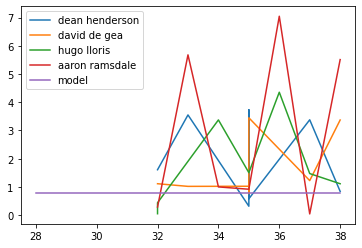

In [185]:
hold_df=hold_test.copy()
plt.plot(hold_df[hold_df['name']=='dean henderson']['GW'],np.abs(hold_df[hold_df['name']=='dean henderson']['y_pred']-hold_df[hold_df['name']=='dean henderson']['y_test']),label='dean henderson')
plt.plot(hold_df[hold_df['name']=='david de gea']['GW'],np.abs(hold_df[hold_df['name']=='david de gea']['y_pred']-hold_df[hold_df['name']=='david de gea']['y_test']),label='david de gea')
plt.plot(hold_df[hold_df['name']=='hugo lloris']['GW'],np.abs(hold_df[hold_df['name']=='hugo lloris']['y_pred']-hold_df[hold_df['name']=='hugo lloris']['y_test']),label='hugo lloris')
plt.plot(hold_df[hold_df['name']=='aaron ramsdale']['GW'],np.abs(hold_df[hold_df['name']=='aaron ramsdale']['y_pred']-hold_df[hold_df['name']=='aaron ramsdale']['y_test']),label='aaron ramsdale')
plt.plot([28,30,32,34,36,38],[0.789761366302951,0.789761366302951,0.789761366302951,0.789761366302951,0.789761366302951,0.789761366302951],label='model')
plt.legend()

In [186]:
hold_df[hold_df['GW']==37].sort_values(by='y_pred',ascending=False).head(5)

,name,GW,season,y_pred,y_test
163,ederson santana de moraes,37,21,6.065956,2
188,emiliano martínez,37,21,4.857791,3
318,jordan pickford,37,21,3.671651,7
244,illan meslier,37,21,3.566330,0
236,hugo lloris,37,21,3.472874,2


In [187]:
hold_df[hold_df['GW']==38].sort_values(by='y_test',ascending=False).head(5)

,name,GW,season,y_pred,y_test
164,ederson santana de moraes,38,21,4.245209,12
7,aaron ramsdale,38,21,3.490157,9
393,lukasz fabianski,38,21,1.753277,9
31,alisson ramses becker,38,21,2.749378,8
423,martin dubravka,38,21,3.476485,7


In [203]:
GW_list=[35,36,37,38]
top_predicted_gk=hold_df[hold_df['GW']==34].sort_values(by='y_pred',ascending=False).head(2)
for GW in GW_list:
    df1=hold_df[hold_df['GW']==GW].sort_values(by='y_pred',ascending=False).head(2)
    top_predicted_gk=pd.concat([top_predicted_gk,df1])
top_predicted_gk


GW_list=[35,36,37,38]
top_actual_gk=hold_df[hold_df['GW']==34].sort_values(by='y_test',ascending=False).head(2)
for GW in GW_list:
    df1=hold_df[hold_df['GW']==GW].sort_values(by='y_test',ascending=False).head(2)
    top_actual_gk=pd.concat([top_actual_gk,df1])
top_actual_gk

,name,GW,season,y_pred,y_test
534,sam johnstone,34,21,4.6,7
168,edouard mendy,34,21,3.4,7
169,edouard mendy,35,21,1.8,11
27,alisson ramses becker,35,21,2.4,10
5,aaron ramsdale,36,21,3.8,10
29,alisson ramses becker,36,21,3.0,10
203,francisco casilla cortés,37,21,0.0,9
422,martin dubravka,37,21,4.2,7
164,ederson santana de moraes,38,21,4.4,12
7,aaron ramsdale,38,21,4.4,9


### KNN

In [204]:
X_train=rolling_df_train.drop(columns='total_points')
X_test=rolling_df_test.drop(columns='total_points')

y_train=rolling_df_train['total_points']
y_test=rolling_df_test['total_points']

In [205]:
X_train

,bps,clean_sheets,goals_conceded,ict_index,minutes,saves,selected,rolling_points,transfers_balance,value,cards,penalty_saves,was_home,opponent_level,team_level,time
34,0.0,0.0,0.0,0.0,0.0,0.0,7198.0,0.0,-99.0,40.0,0.0,0.009804,1,1200.0,1020.0,14
35,11.0,0.0,1.0,1.0,90.0,2.0,3091.0,2.0,0.0,45.0,0.0,0.009804,0,1020.0,1020.0,14
36,24.0,0.0,1.0,4.0,90.0,6.0,8566.0,4.0,2802.0,45.0,0.0,0.009804,1,1340.0,1020.0,13
37,12.0,0.0,3.0,1.9,90.0,2.0,13643.0,1.0,3236.0,45.0,0.0,0.009804,0,1210.0,1020.0,14
38,13.0,0.0,3.0,1.3,90.0,2.0,19406.0,1.0,4356.0,45.0,0.0,0.009804,1,1240.0,1020.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916,0.0,0.0,0.0,0.0,0.0,0.0,302548.0,0.0,-17075.0,40.0,0.0,0.000000,0,1000.0,1160.0,18
11917,0.0,0.0,0.0,0.0,0.0,0.0,302548.0,0.0,-17075.0,40.0,0.0,0.000000,1,1110.0,1100.0,17
11918,0.0,0.0,0.0,0.0,0.0,0.0,299689.0,0.0,-3834.0,40.0,0.0,0.000000,0,1050.0,1160.0,20
11919,0.0,0.0,0.0,0.0,0.0,0.0,295984.0,0.0,-3714.0,40.0,0.0,0.000000,1,1250.0,1100.0,19


In [206]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [207]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

result=cross_val_score(reg, X_train, y_train).mean()

result


0.3721028486920326

In [208]:
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

0.849642857142857

In [209]:
hold_test['y_pred']=y_pred

<ipython-input-209-9c4b9cdd679b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_pred']=y_pred


In [210]:
hold_test['y_test']=y_test

<ipython-input-210-088461d3fca5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_test['y_test']=y_test


In [211]:
hold_test[hold_test['name']=='hugo lloris']

,name,GW,season,y_pred,y_test
231,hugo lloris,32,21,4.0,3
232,hugo lloris,32,21,2.8,3
233,hugo lloris,34,21,2.4,6
234,hugo lloris,35,21,3.4,2
235,hugo lloris,36,21,4.0,8
236,hugo lloris,37,21,3.4,2
237,hugo lloris,38,21,4.2,2


In [212]:
hold_test[hold_test['name']=='david de gea']

,name,GW,season,y_pred,y_test
135,david de gea,32,21,0.0,0
136,david de gea,33,21,0.0,0
137,david de gea,35,21,0.4,0
138,david de gea,35,21,0.0,1
139,david de gea,35,21,5.0,0
140,david de gea,37,21,0.2,3
141,david de gea,38,21,1.6,0


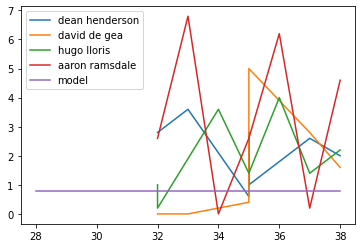

In [213]:
hold_df=hold_test.copy()
plt.plot(hold_df[hold_df['name']=='dean henderson']['GW'],np.abs(hold_df[hold_df['name']=='dean henderson']['y_pred']-hold_df[hold_df['name']=='dean henderson']['y_test']),label='dean henderson')
plt.plot(hold_df[hold_df['name']=='david de gea']['GW'],np.abs(hold_df[hold_df['name']=='david de gea']['y_pred']-hold_df[hold_df['name']=='david de gea']['y_test']),label='david de gea')
plt.plot(hold_df[hold_df['name']=='hugo lloris']['GW'],np.abs(hold_df[hold_df['name']=='hugo lloris']['y_pred']-hold_df[hold_df['name']=='hugo lloris']['y_test']),label='hugo lloris')
plt.plot(hold_df[hold_df['name']=='aaron ramsdale']['GW'],np.abs(hold_df[hold_df['name']=='aaron ramsdale']['y_pred']-hold_df[hold_df['name']=='aaron ramsdale']['y_test']),label='aaron ramsdale')
plt.plot([28,30,32,34,36,38],[0.789761366302951,0.789761366302951,0.789761366302951,0.789761366302951,0.789761366302951,0.789761366302951],label='model')
plt.legend()

In [214]:
hold_df[hold_df['GW']==37].sort_values(by='y_pred',ascending=False).head(5)

,name,GW,season,y_pred,y_test
188,emiliano martínez,37,21,5.2,3
494,robert sánchez,37,21,5.2,0
244,illan meslier,37,21,5.0,0
422,martin dubravka,37,21,4.2,7
537,sam johnstone,37,21,4.0,2


In [215]:
hold_df[hold_df['GW']==38].sort_values(by='y_test',ascending=False).head(5)

,name,GW,season,y_pred,y_test
164,ederson santana de moraes,38,21,4.4,12
7,aaron ramsdale,38,21,4.4,9
393,lukasz fabianski,38,21,0.0,9
31,alisson ramses becker,38,21,2.8,8
423,martin dubravka,38,21,4.0,7


# Top 11 predicted players for each gameweek

In [245]:
positions=['FWD']*15+['MID']*25+['DEF']*25+['GK']*10

In [246]:
print(top_predicted_fwd.shape)
print(top_predicted_mid.shape)
print(top_predicted_def.shape)
print(top_predicted_gk.shape)
print(top_actual_fwd.shape)
print(top_actual_mid.shape)
print(top_actual_def.shape)
print(top_actual_gk.shape)





(15, 5)
(25, 5)
(25, 5)
(10, 5)
(15, 5)
(25, 5)
(25, 5)
(10, 5)


In [247]:
predicted=[top_predicted_fwd, top_predicted_mid, top_predicted_def, top_predicted_gk]

actual=[top_actual_fwd, top_actual_mid, top_actual_def, top_actual_gk]

top_predicted = pd.concat(predicted)
top_actual = pd.concat(actual)

top_predicted.groupby('GW').sum()

,season,y_pred,y_test
GW,,,
34,315,72.764292,61
35,315,82.265476,89
36,315,75.793807,59
37,315,74.054897,60
38,315,72.331458,59


In [248]:
top_predicted['pos']=positions

In [249]:
top_actual['pos']=positions

In [254]:
top_actual.groupby('GW').sum()

,season,y_pred,y_test
GW,,,
34,315,42.086602,167
35,315,37.846077,168
36,315,44.750187,172
37,315,40.951145,156
38,315,47.932980,186


In [257]:
top_predicted['y_test'].sum()

328

In [225]:
top_actual['y_test'].sum()

849

In [226]:
849-328

521

In [381]:
top_actual[top_actual.GW==34].sort_values('pos',ascending=False)

,name,GW,season,y_pred,y_test,pos
406,gareth bale,34,21,3.797842,21,MID
771,kai havertz,34,21,4.078725,16,MID
1126,pierre-emerick aubameyang,34,21,0.582917,12,MID
482,heung-min son,34,21,6.075437,12,MID
981,mohamed naser el sayed elneny,34,21,0.819089,11,MID
534,sam johnstone,34,21,4.600000,7,GK
168,edouard mendy,34,21,3.400000,7,GK
328,michail antonio,34,21,0.590040,13,FWD
125,danny welbeck,34,21,3.147722,12,FWD
140,dominic calvert-lewin,34,21,2.046661,8,FWD


In [360]:
top_predicted[top_predicted.GW==34].sort_values('pos',ascending=False)

,name,GW,season,y_pred,y_test,pos
482,heung-min son,34,21,6.075437,12,MID
901,mason mount,34,21,5.794932,6,MID
232,christian pulisic,34,21,5.020375,0,MID
771,kai havertz,34,21,4.078725,16,MID
670,jesse lingard,34,21,3.857403,2,MID
517,rui pedro dos santos patrício,34,21,5.200000,2,GK
184,emiliano martínez,34,21,5.000000,2,GK
191,harry kane,34,21,7.452984,2,FWD
207,jamie vardy,34,21,5.838458,2,FWD
268,kelechi iheanacho,34,21,5.701920,5,FWD


In [409]:
def get_best_11(df,week=38):
    best_15=df[df.GW==week]
    best_11=best_15.head(0).copy()
    sub_4=best_15.head(0).copy()
    best_11=pd.concat([best_11,best_15[best_15.pos=='GK'].sort_values('y_pred',ascending=False).head(1)])

    best_11=pd.concat([best_11,best_15[best_15.pos=='DEF'].sort_values('y_pred',ascending=False).head(3)])
    
    captain=best_15.sort_values('y_pred',ascending=False).head(1).name.unique()[0]
    vice_captain=best_15.sort_values('y_pred',ascending=False).head(2).name.unique()[1]
    print(best_11)
    print(captain)
    print(vice_captain)
    
    for i,row in best_15.sort_values('y_pred',ascending=False).iterrows():
        row=pd.DataFrame([row])
        if len(best_11)<11:
            if row.name.unique()[0] in best_11.name.unique():
                continue
            elif row.pos.unique()[0] == 'GK':
                sub_4=pd.concat([sub_4,row])
                continue
            else:
                best_11=pd.concat([best_11,row])
        elif row.name.unique()[0] in best_11.name.unique():
                print(row.name.unique())
                continue
        elif len(best_11)==11 and len(sub_4)<4:
            sub_4=pd.concat([sub_4,row])
    
    return best_11, sub_4, captain, vice_captain
    
    
    
    
    
best_11_36, sub_4_36, captain_36,vice_captain_36 = get_best_11(top_predicted,36)
best_11_36.sort_values('pos')


                        name  GW  season    y_pred  y_test  pos
210           fraser forster  36      21  5.400000       0   GK
1144  trent alexander-arnold  36      21  5.962996       6  DEF
727              lucas digne  36      21  4.245756       2  DEF
52          andrew robertson  36      21  4.177683       2  DEF
mohamed salah
heung-min son
['lucas digne']
['andrew robertson']


,name,GW,season,y_pred,y_test,pos
1144,trent alexander-arnold,36,21,5.962996,6,DEF
727,lucas digne,36,21,4.245756,2,DEF
52,andrew robertson,36,21,4.177683,2,DEF
398,richarlison de andrade,36,21,4.553650,2,FWD
143,dominic calvert-lewin,36,21,4.545645,2,FWD
210,fraser forster,36,21,5.400000,0,GK
988,mohamed salah,36,21,8.681603,10,MID
484,heung-min son,36,21,6.472026,3,MID
1213,sadio mané,36,21,5.160620,5,MID
408,gareth bale,36,21,4.956642,7,MID


In [410]:
sub_4_36

,name,GW,season,y_pred,y_test,pos
391,lukasz fabianski,36,21,5.000000,2,GK
193,harry kane,36,21,4.261283,8,FWD
1093,stuart dallas,36,21,4.095830,6,DEF
130,ben godfrey,36,21,3.872124,2,DEF


In [411]:
vice_captain_36

'heung-min son'

In [412]:
hypothetical_team=['edouard mendy', 'aaron cresswell', 'benjamin chilwell', 'john stones',
                  'kevin de bruyne', 'joseph willok', 'jesse lingard', 'jack harrison', 
                   'raphael dias belloli', 'harry kane','michail antonio', 'illan meslier', 
                   'victor lindelöf', 'dominic calvert-lewin', 'nathaniel phillips']

In [413]:
best_11_38, sub_4_38, captain_38,vice_captain_38 = get_best_11(hypothetical_team,38)
best_11_36.sort_values('pos')



AttributeError: 'list' object has no attribute 'GW'

# The end